In [1]:
# !pip install numpy-financial

In [2]:
import matplotlib.pyplot as plt
import numpy_financial as nf

## Basit Faiz
Her zaman ana para üzerinden hesaplanan faiz.


**BD:** Paranın bugünkü değeri (Anapara)

**r:** Faiz oranı

**t:** Dönem sayısı

**DS:** Dönem sonu elde edilecek tutar

#### DS = BD*(1 + (t * r))

In [3]:
def basitFaiz(bd, r, t):
    ds = bd*(1+(t*r))
    return ds

In [4]:
print(basitFaiz(100, 0.1, 3))

130.0


In [5]:
# Her dönemin sonunda (5 dönem için)

for i in range(1,6):
    print(basitFaiz(100, 0.1, i))

110.00000000000001
120.0
130.0
140.0
150.0


In [6]:
# 5000 TL %9.5 yıllık basit faiz getirisiyle 1 yıllık mevduata yatırılırsa
# Dönem sonu paramız ne kadar olur?
# Ne kadarı faiz getirisidir ?

In [7]:
print(basitFaiz(5000, 0.095, 1))
print(basitFaiz(5000, 0.095, 1) - 5000)     # ds - bd = faiz getirisi

5475.0
475.0


In [8]:
# Yıllık %9 faizle verilen 2000 TL borç, 3 ay sonunda geri alınırsa elde edilecek para ne olur ?

print(basitFaiz(2000, 0.09, 3/12))

2045.0


## Bileşik Faiz
En son dönemdeki parasal değere eklenerek hesaplanan faiz.


**BD:** Paranın bugünkü değeri (Anapara)

**r:** Faiz oranı

**t:** Dönem sayısı

**DS:** Dönem sonu elde edilecek tutar

#### DS = BD*(1+r)^t

In [9]:
def bilesikFaiz(bd, r, t):
    ds = bd*(1+r)**t
    return ds

In [10]:
print(bilesikFaiz(100, 0.1, 5))

161.05100000000004


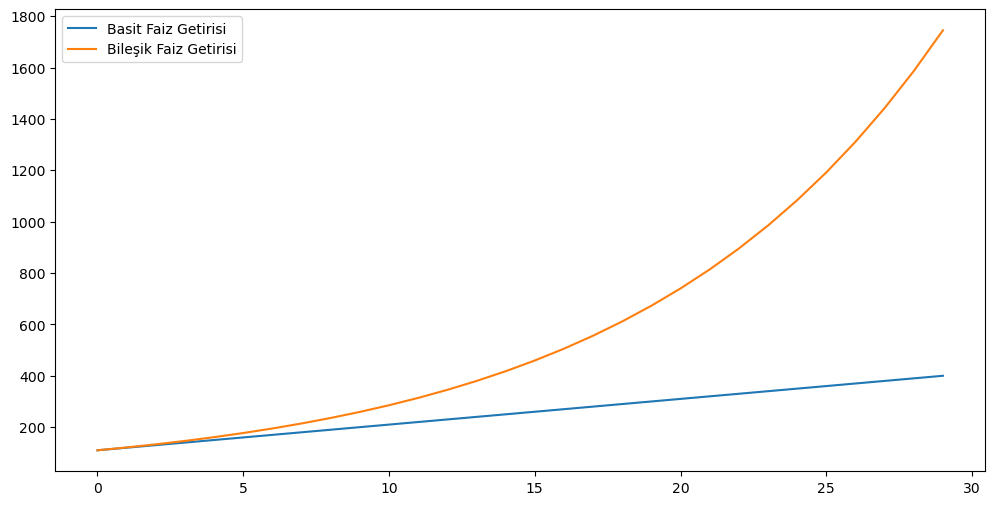

In [11]:
basit = []
bilesik = []

# 30 dönemlik basit ve bileşik faiz getirisi karşılaştırma
for i in range(1,31): 
    basit.append(basitFaiz(100, 0.1, i))
    bilesik.append(bilesikFaiz(100, 0.1, i))
 
plt.figure(figsize = (12,6))
plt.plot(basit, label = "Basit Faiz Getirisi")
plt.plot(bilesik, label = "Bileşik Faiz Getirisi")
plt.legend()
plt.show();             

In [12]:
# with numpy-financial

# rate: faiz oranı
# nper: dönem sayısı
# pmt: dönemsel ekleme
# pv: ana para ( negatif verilmeli)

bilesik = nf.fv(rate = 0.1, nper = 20, pmt = 0, pv = -100)

print(bilesikFaiz(100, 0.1, 20))
print(bilesik)

672.7499949325611
672.7499949325611
